In [1]:
suppressMessages(suppressWarnings(source("../config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


In [2]:
###
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Ratio.GATA1.unstranded.perbase.tsv"
fpath = file.path(fdiry, fname)

dat_astarr_gata1 = read_tsv(fpath, show_col_types = FALSE)
head(dat_astarr_gata1)

Chrom,Loc,Input,Output,FC_out00_inp01,FC_out01_inp01,FC_out10_inp10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786400,0,0,0,1,1
chrX,47786401,0,0,0,1,1
chrX,47786402,0,0,0,1,1
chrX,47786403,0,0,0,1,1
chrX,47786404,0,0,0,1,1
chrX,47786405,0,0,0,1,1


In [3]:
###
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Ratio.MYC.unstranded.perbase.tsv"
fpath = file.path(fdiry, fname)

dat_astarr_myc = read_tsv(fpath, show_col_types = FALSE)
head(dat_astarr_myc)

Chrom,Loc,Input,Output,FC_out00_inp01,FC_out01_inp01,FC_out10_inp10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr8,126735900,0,0,0,1,1
chr8,126735901,0,0,0,1,1
chr8,126735902,0,0,0,1,1
chr8,126735903,0,0,0,1,1
chr8,126735904,0,0,0,1,1
chr8,126735905,0,0,0,1,1


In [8]:
### set bins
start  = 48780000
end    = 48826000
size   = 100
breaks = seq(start, end, size)

df1 = dat_astarr_gata1
df1$group = cut(df1$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

In [9]:
### summarize the ratio
df1 = df1 %>% 
    group_by(group) %>% 
    summarize(
        Input        = mean(Input),
        Output       = mean(Output),
        FC1_mean     = mean(FC_out00_inp01),
        FC2_mean     = mean(FC_out01_inp01),
        FC3_mean     = mean(FC_out10_inp10),
        Log2fc2_mean = mean(log2(FC_out01_inp01)),
        Log2fc3_mean = mean(log2(FC_out10_inp10))) %>%
    mutate(
        FC     = Output / Input,
        Log2fc = log2(Output / Input)) %>%
    na.omit

df1 = df1 %>% 
    mutate(group = gsub("\\[|\\)", "", group)) %>%
    separate(group, c("Left", "Right")) %>%
    mutate(Left = as.integer(Left), Right = as.integer(Right))

print(head(df1, 3))

# A tibble: 3 × 11
      Left    Right     Input    Output  FC1_mean FC2_mean FC3_mean Log2fc2_mean
     <int>    <int>     <dbl>     <dbl>     <dbl>    <dbl>    <dbl>        <dbl>
1 48780000 48780100 0.000160  0.000106  0.000106      1.00     1.00   -0.0000785
2 48780100 48780200 0.000126  0.000107  0.000107      1.00     1.00   -0.0000282
3 48780200 48780300 0.0000780 0.0000690 0.0000690     1.00     1.00   -0.0000129
# … with 3 more variables: Log2fc3_mean <dbl>, FC <dbl>, Log2fc <dbl>


In [21]:
###
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Depth.GATA1.unstranded.perbase.tsv"
fpath = file.path(fdiry, fname)

dat_astarr_gata1 = read_tsv(fpath, show_col_types = FALSE)
head(dat_astarr_gata1)

Chrom,Loc,Sample,Group,Replicate,Region,Depth,Size,Depth_Norm
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chrX,47786400,Input_rep1,Input,rep1,GATA1,0,358823,0
chrX,47786401,Input_rep1,Input,rep1,GATA1,0,358823,0
chrX,47786402,Input_rep1,Input,rep1,GATA1,0,358823,0
chrX,47786403,Input_rep1,Input,rep1,GATA1,0,358823,0
chrX,47786404,Input_rep1,Input,rep1,GATA1,0,358823,0
chrX,47786405,Input_rep1,Input,rep1,GATA1,0,358823,0


In [22]:
###
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Depth.MYC.unstranded.perbase.tsv"
fpath = file.path(fdiry, fname)

dat_astarr_myc = read_tsv(fpath, show_col_types = FALSE)
head(dat_astarr_myc)

Chrom,Loc,Sample,Group,Replicate,Region,Depth,Size,Depth_Norm
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr8,126735900,Input_rep1,Input,rep1,MYC,0,255600,0
chr8,126735901,Input_rep1,Input,rep1,MYC,0,255600,0
chr8,126735902,Input_rep1,Input,rep1,MYC,0,255600,0
chr8,126735903,Input_rep1,Input,rep1,MYC,0,255600,0
chr8,126735904,Input_rep1,Input,rep1,MYC,0,255600,0
chr8,126735905,Input_rep1,Input,rep1,MYC,0,255600,0


In [5]:
### init: set file directory and path
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "count")
fname = "Tile_K562_hg38_20210130.GATA1.bed"
fpath = file.path(fdiry, fname)

### init: set column names
cnames = c("Chrom", "Start", "End", "ID", "Score", "Strand", 
           "log2fc", "Input_Count", "Output_Count", 
           "log10pval", "log10fdr", "lfc-se")

### import data
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% mutate(Loc = (Start + End) / 2)

### assign
dat_tmpra_gata1 = dat
print(dim(dat))
head(dat)

[1] 52312    13


Chrom,Start,End,ID,Score,Strand,log2fc,Input_Count,Output_Count,log10pval,log10fdr,lfc-se,Loc
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786401,47786600,X:47786401-47786600,.,+,2.30593934,2117.787,10474.869,112.1126526,110.93113079,0.10214790,47786500
chrX,47786451,47786650,X:47786451-47786650,.,+,0.78305606,1386.007,2387.119,11.3173884,10.64251685,0.11330705,47786550
chrX,47786501,47786700,X:47786501-47786700,.,+,-0.12873196,1955.626,1788.236,0.8450697,0.62872262,0.08785968,47786600
chrX,47786551,47786750,X:47786551-47786750,.,+,0.58829515,2388.997,3591.264,11.2404554,10.56667887,0.08543661,47786650
chrX,47786601,47786800,X:47786601-47786800,.,+,0.06670014,2102.916,2202.385,0.3095900,0.21047015,0.09667741,47786700
chrX,47786651,47786850,X:47786651-47786850,.,+,-0.02967703,1571.259,1537.475,0.1009399,0.06453099,0.11287406,47786750


In [6]:
### init: set file directory and path
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "count")
fname = "Tile_K562_hg38_20210130.MYC.bed"
fpath = file.path(fdiry, fname)

### init: set column names
cnames = c("Chrom", "Start", "End", "ID", "Score", "Strand", 
           "log2fc", "Input_Count", "Output_Count", 
           "log10pval", "log10fdr", "lfc-se")

### import data
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% mutate(Loc = (Start + End) / 2)

### assign
dat_tmpra_myc = dat
print(dim(dat))
head(dat)

[1] 41898    13


Chrom,Start,End,ID,Score,Strand,log2fc,Input_Count,Output_Count,log10pval,log10fdr,lfc-se,Loc
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr8,126735901,126736100,8:126735901-126736100,.,+,3.2160073,889.8700,8270.0812,284.9689198,283.4609266,0.08903507,126736000
chr8,126735951,126736150,8:126735951-126736150,.,+,2.7418446,125.8346,840.9388,113.6888331,112.5014934,0.12060331,126736050
chr8,126736001,126736200,8:126736001-126736200,.,+,2.9727423,510.3155,4005.3567,184.5772002,183.2318991,0.10239769,126736100
chr8,126736051,126736250,8:126736051-126736250,.,+,0.5182375,702.5493,1005.3594,5.5903406,5.0334324,0.11020176,126736150
chr8,126736101,126736300,8:126736101-126736300,.,+,0.8541811,551.0831,995.4698,14.4458053,13.7295763,0.10855385,126736200
chr8,126736151,126736350,8:126736151-126736350,.,+,-0.1705365,916.6257,814.0604,0.8691763,0.6486783,0.11414081,126736250


## ASTARR

In [23]:
dat = dat_astarr_gata1

dat = dat %>% 
    group_by(Loc, Group) %>% 
    summarize(Value = mean(Depth_Norm), .groups='drop') %>% 
    spread(Group, Value) %>%
    mutate(
        FC1 =  Output     / (Input+1),
        FC2 = (Output+1)  / (Input+1),
        FC3 = (Output+10) / (Input+10)) %>%
    mutate(
        Log2fc2 = log2(FC2),
        Log2fc3 = log2(FC3)
    )
        
### assign
dat_astarr = dat
print(dim(dat_astarr))
head(dat_astarr)

[1] 2000350       8


Loc,Input,Output,FC1,FC2,FC3,Log2fc2,Log2fc3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
47786400,0,0,0,1,1,0,0
47786401,0,0,0,1,1,0,0
47786402,0,0,0,1,1,0,0
47786403,0,0,0,1,1,0,0
47786404,0,0,0,1,1,0,0
47786405,0,0,0,1,1,0,0


In [26]:
### set bins
start  = 48780000
end    = 48826000
size   = 100
breaks = seq(start, end, size)

df1 = dat_astarr
df1$group = cut(df1$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

In [30]:
dat = dat_astarr_myc

dat = dat %>% 
    group_by(Loc, Group) %>% 
    summarize(Value = mean(Depth_Norm), .groups='drop') %>% 
    spread(Group, Value) %>%
    mutate(
        FC1 =  Output     / (Input+1),
        FC2 = (Output+1)  / (Input+1),
        FC3 = (Output+10) / (Input+10)) %>%
    mutate(
        Log2fc2 = log2(FC2),
        Log2fc3 = log2(FC3)
    )
        
### assign
df_astarr_myc = dat
print(dim(dat))
head(dat)

[1] 2000350       8


Loc,Input,Output,FC1,FC2,FC3,Log2fc2,Log2fc3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
126735900,0,0,0,1,1,0,0
126735901,0,0,0,1,1,0,0
126735902,0,0,0,1,1,0,0
126735903,0,0,0,1,1,0,0
126735904,0,0,0,1,1,0,0
126735905,0,0,0,1,1,0,0


`chr8:126735900-128736250`

MYC = `chr8:127,733,434-127,744,951`

```
chr8:126735900-128736250
chr8:127733434-127744951
```

In [31]:
### set bins
start  = 126735900
end    = 128736250
size   = 100
breaks = seq(start, end, size)

df1 = df_astarr_myc
df1$group = cut(df1$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

In [32]:
### summarize the ratio
df1 = df1 %>% 
    group_by(group) %>% 
    summarize(
        Input        = mean(Input),
        Output       = mean(Output),
        FC1_mean     = mean(FC1),
        FC2_mean     = mean(FC2),
        FC3_mean     = mean(FC3),
        Log2fc2_mean = mean(Log2fc2),
        Log2fc3_mean = mean(Log2fc3)) %>%
    mutate(
        FC     = Output / Input,
        Log2fc = log2(Output / Input)) %>%
    na.omit

df1 = df1 %>% 
    mutate(group = gsub("\\[|\\)", "", group)) %>%
    separate(group, c("Left", "Right")) %>%
    mutate(Left = as.integer(Left), Right = as.integer(Right))

print(head(df1, 3))

# A tibble: 3 × 11
       Left     Right      Input  Output FC1_mean FC2_mean FC3_mean Log2fc2_mean
      <int>     <int>      <dbl>   <dbl>    <dbl>    <dbl>    <dbl>        <dbl>
1 126735900 126736000 0.00000120 1.56e-7  1.56e-7     1.00     1.00  -0.00000151
2 126736000 126736100 0.0000239  1.65e-5  1.65e-5     1.00     1.00  -0.0000107 
3 126736100 126736200 0.0000490  7.44e-5  7.44e-5     1.00     1.00   0.0000366 
# … with 3 more variables: Log2fc3_mean <dbl>, FC <dbl>, Log2fc <dbl>


In [10]:
### create figure
dat = df1

gp11 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC1_mean)) +
    labs(y="Mean(FC)", title="ATAC-STARR (FC = Output / (Input+1))") +
    theme_cowplot()

gp12 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC2_mean)) +
    labs(y="Mean(FC)", title="ATAC-STARR (FC = (Output+1) / (Input+1))") +
    theme_cowplot()

gp13 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Log2fc2_mean)) +
    labs(y="Mean(Log2(FC))", title="ATAC-STARR (FC = (Output+1) / (Input+1))") +
    theme_cowplot()

gp14 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC3_mean)) +
    labs(y="Mean(FC)", title="ATAC-STARR (FC = (Output+10) / (Input+10))") +
    theme_cowplot()

gp15 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Log2fc3_mean)) +
    labs(y="Mean(Log2(FC))", title="ATAC-STARR (FC = (Output+10) / (Input+10))") +
    theme_cowplot()


gp16 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC)) +
    labs(y="FC", title="ATAC-STARR") +
    theme_cowplot()
        
gp17 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Log2fc)) +
    labs(y="Log2(FC)", title="ATAC-STARR") +
    theme_cowplot()

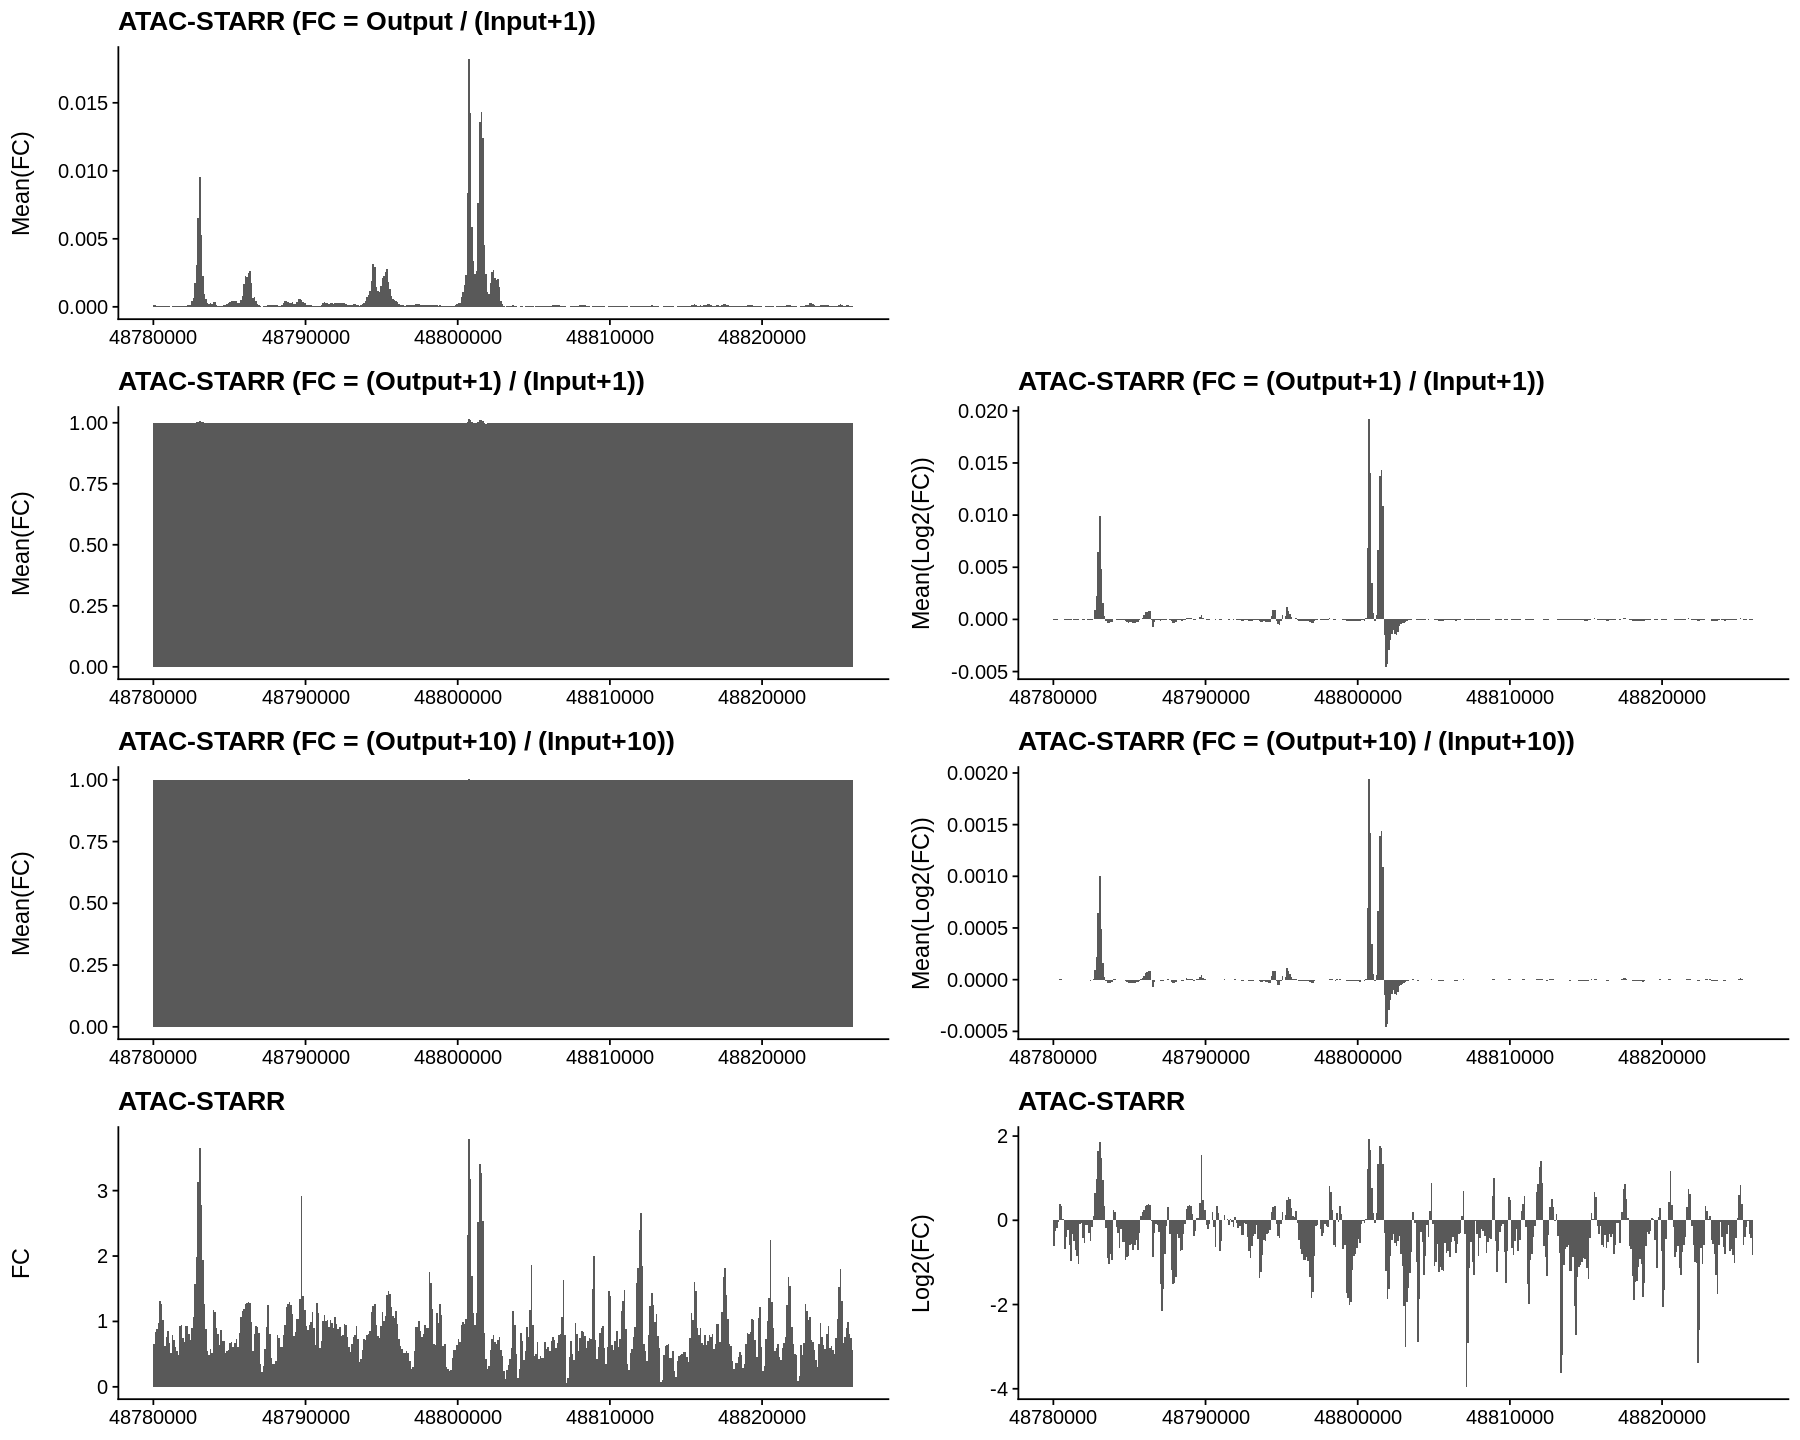

In [11]:
options(repr.plot.height=12, repr.plot.width=15)
plot_grid(
    gp11,
    NULL,
    gp12,
    gp13,
    gp14,
    gp15,
    gp16,
    gp17,
    align="v",  
    nrow=4)

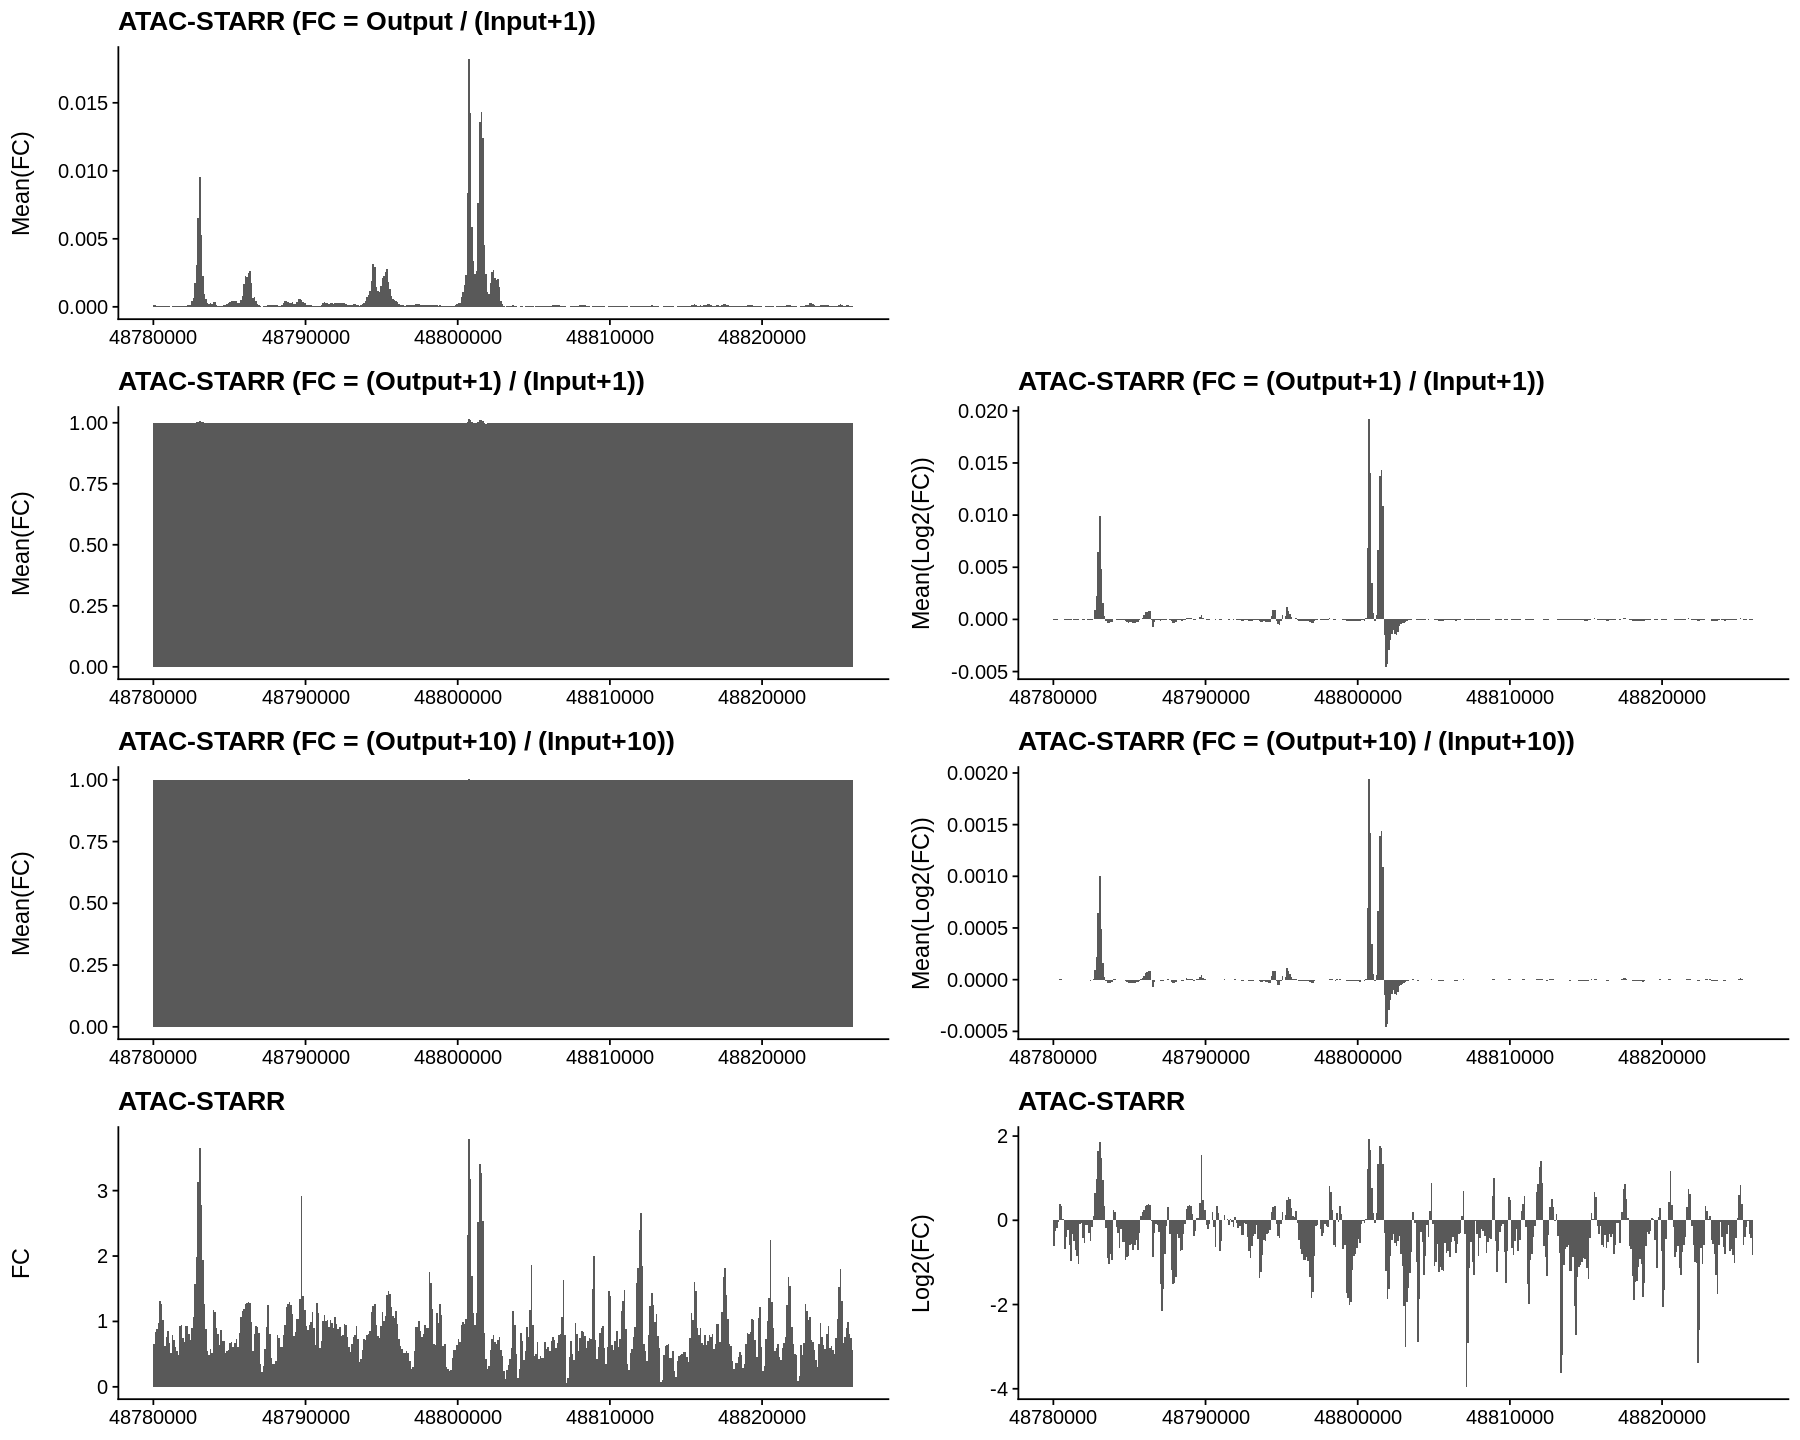

In [29]:
options(repr.plot.height=12, repr.plot.width=15)
plot_grid(
    gp11,
    NULL,
    gp12,
    gp13,
    gp14,
    gp15,
    gp16,
    gp17,
    align="v",  
    nrow=4)

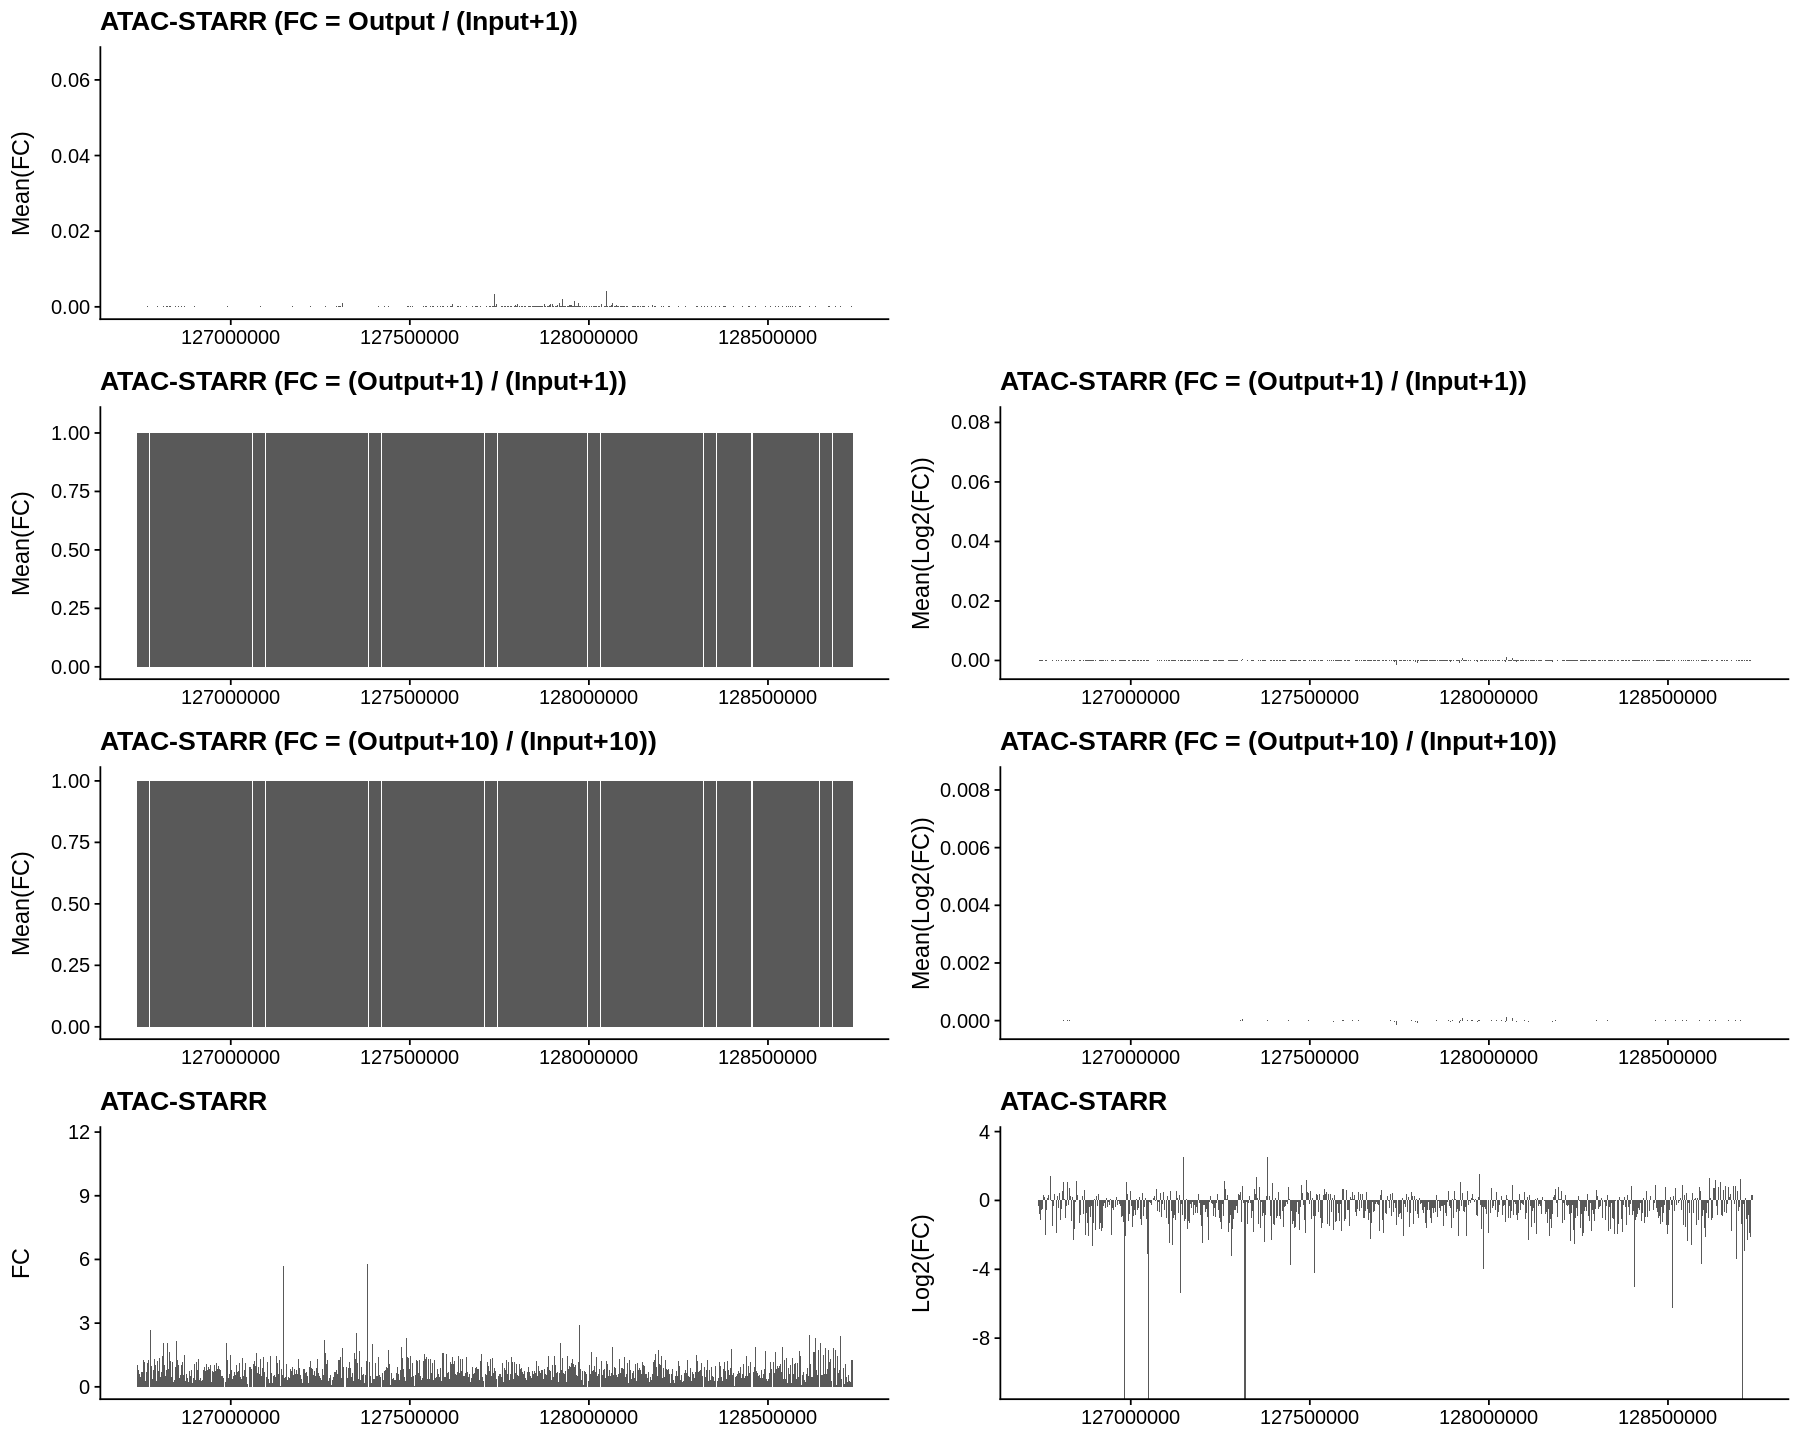

In [34]:
options(repr.plot.height=12, repr.plot.width=15)
plot_grid(
    gp11,
    NULL,
    gp12,
    gp13,
    gp14,
    gp15,
    gp16,
    gp17,
    align="v",  
    nrow=4)

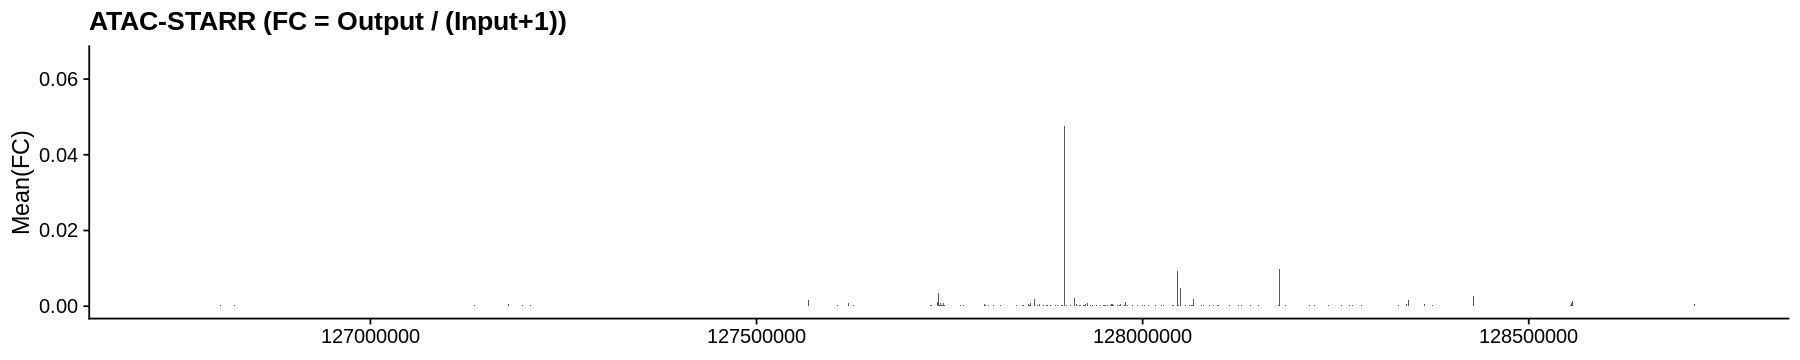

In [36]:
options(repr.plot.height=3, repr.plot.width=15)
gp11 + xlim

In [7]:
print(range(dat_tmpra_myc$Start))
print(range(dat_tmpra_myc$End))

[1] 126735901 128736051
[1] 126736100 128736250


In [13]:
### set bins
start  = 48780000
end    = 48826000
size   = 100
breaks = seq(start, end, size)

df2 = dat_tmpra_gata1
df2$group = cut(df2$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

In [17]:
### set bins
start  = 126735900
end    = 128736250
size   = 100
breaks = seq(start, end, size)

df2 = dat_tmpra_myc
df2$group = cut(df2$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

In [18]:
df2 = df2 %>% 
    group_by(group) %>%
    summarize(
        Input   = mean(Input_Count),
        Output  = mean(Output_Count),
        FC_mean = mean(2^log2fc),
        Log2fc_mean = mean(log2fc)) %>%
    mutate(
        FC     = Output / Input,
        Log2fc = log2(Output / Input)) %>%
    na.omit

df2 = df2 %>% 
    mutate(group = gsub("\\[|\\)", "", group)) %>%
    separate(group, c("Left", "Right")) %>%
    mutate(Left = as.integer(Left), Right = as.integer(Right))

cat("Tiling MPRA", dim(df2), "\n")
print(head(df2, 3))

Tiling MPRA 19978 8 
# A tibble: 3 × 8
       Left     Right Input Output FC_mean Log2fc_mean    FC Log2fc
      <int>     <int> <dbl>  <dbl>   <dbl>       <dbl> <dbl>  <dbl>
1 126736000 126736100  508.  4556.    7.99       2.98   8.97  3.17 
2 126736100 126736200  606.  2505.    4.64       1.75   4.13  2.05 
3 126736200 126736300  734.   905.    1.35       0.342  1.23  0.302


In [19]:
### create figure
dat = df2

gp21 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC_mean)) +
    labs(y="Mean(FC)", title="Tiling MPRA") +
    theme_cowplot()

gp22 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Log2fc_mean)) +
    labs(y="Mean(Log2fc)", title="Tiling MPRA") +
    theme_cowplot()

gp23 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC)) +
    labs(y="FC", title="Tiling MPRA") +
    theme_cowplot()

gp24 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Log2fc)) +
    labs(y="Log2fc", title="Tiling MPRA") +
    theme_cowplot()

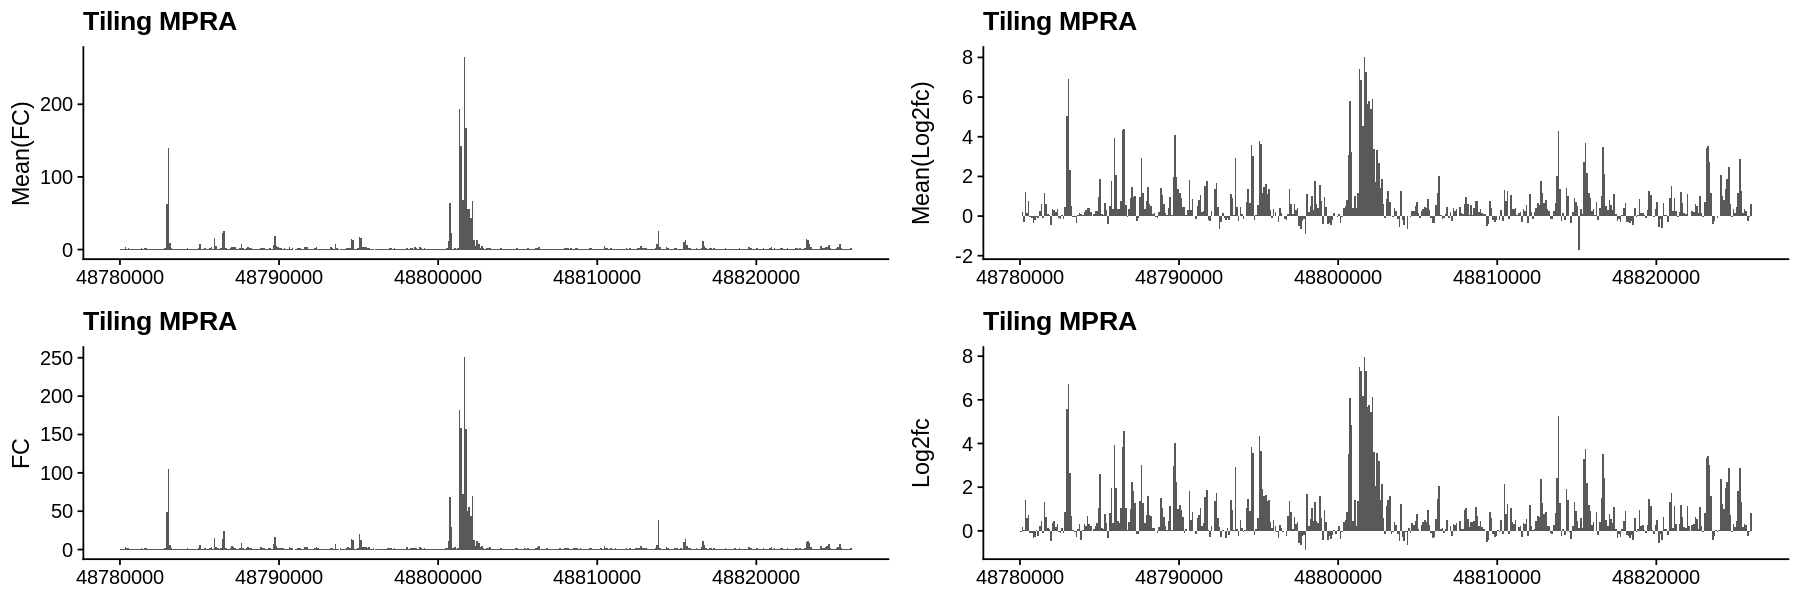

In [16]:
options(repr.plot.height=5, repr.plot.width=15)
plot_grid(
    gp21,# + ylim(0, 3000), 
    gp22,# + ylim(0, 10), 
    gp23,
    gp24,
    align="v", 
    nrow=2, 
    ncol=2)

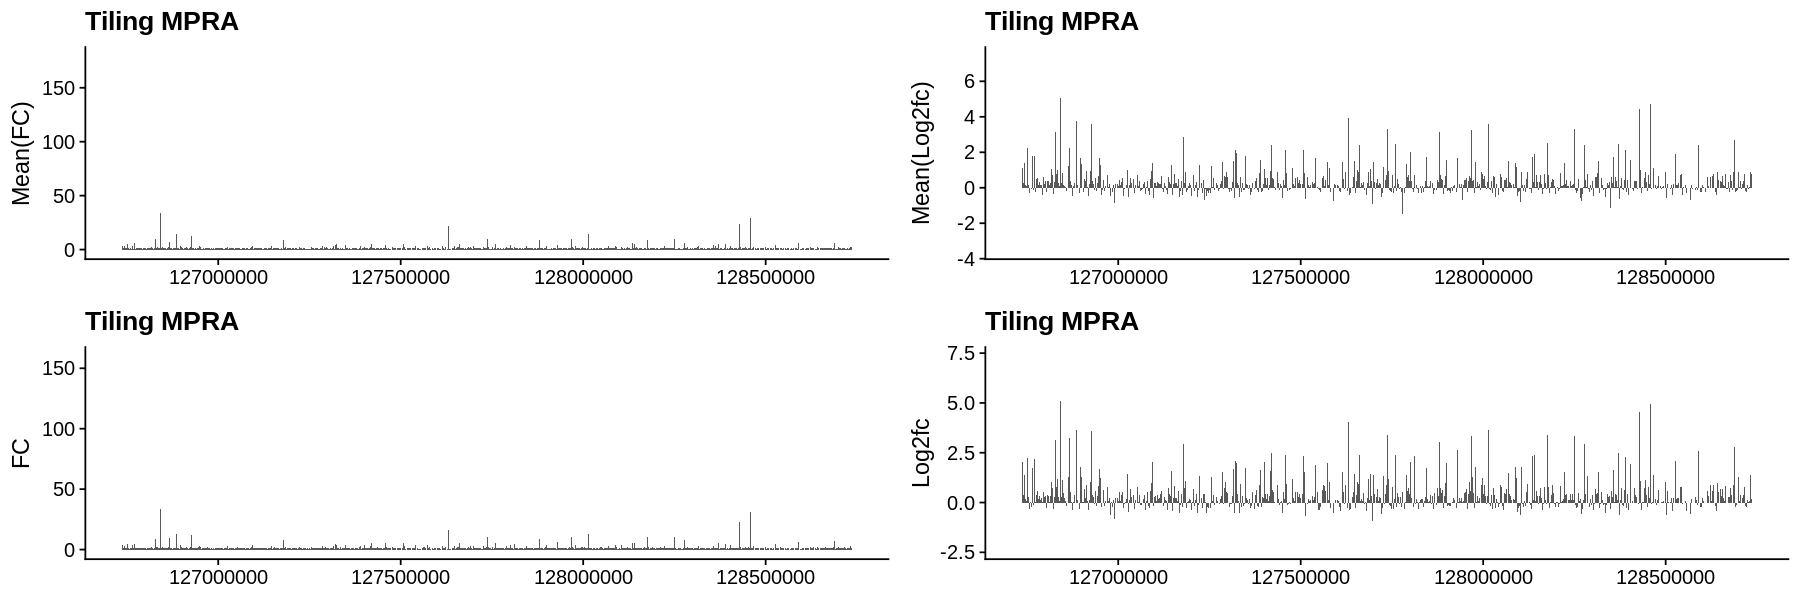

In [20]:
options(repr.plot.height=5, repr.plot.width=15)
plot_grid(
    gp21,# + ylim(0, 3000), 
    gp22,# + ylim(0, 10), 
    gp23,
    gp24,
    align="v", 
    nrow=2, 
    ncol=2)